# Flights Price Prediction Project:-

In [2]:
# For importing neccessary libraries:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the csv file:-
data=pd.read_csv("Flightsdata.csv")

In [4]:
# .head used for fetching first five rows of the dataset:- 
data.head()

,Unnamed: 0,Airlines,Travel_date,From,To,Departuretime,Arrivaltime,Stops,Price
0,0,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
1,1,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
2,2,AirAsia,01/03/2022,NewDelhi,Mumbai,20:00,02:25,1stopviaGoa,5953
3,3,AirAsia,01/03/2022,NewDelhi,Mumbai,12:20,02:25,1stopviaGoa,5953
4,4,AirAsia,01/03/2022,NewDelhi,Mumbai,20:45,07:15,1stopviaBengaluru,5953


# Exploratory Data Analysis (EDA):-

In [5]:
# For checking how many rows and columns are there in dataset.
data.shape

(7995, 9)

So, As seen above there are 7995 rows and 9 columns present in this dataset.

In [6]:
# For checking the available columns in the dataset.
data.columns

Index(['Unnamed: 0', 'Airlines', 'Travel_date', 'From', 'To', 'Departuretime',
       'Arrivaltime', 'Stops', 'Price'],
      dtype='object')

In [7]:
# For checking the Null values in the dataset:-
data.isnull().sum()

Unnamed: 0       0
Airlines         0
Travel_date      0
From             0
To               0
Departuretime    0
Arrivaltime      0
Stops            0
Price            0
dtype: int64

As seen, there are no null values present in dataset.

In [8]:
# For checking the datatypes of each columns:
data.dtypes

Unnamed: 0        int64
Airlines         object
Travel_date      object
From             object
To               object
Departuretime    object
Arrivaltime      object
Stops            object
Price             int64
dtype: object

In [9]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7995 non-null   int64 
 1   Airlines       7995 non-null   object
 2   Travel_date    7995 non-null   object
 3   From           7995 non-null   object
 4   To             7995 non-null   object
 5   Departuretime  7995 non-null   object
 6   Arrivaltime    7995 non-null   object
 7   Stops          7995 non-null   object
 8   Price          7995 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 562.3+ KB


In [10]:
# For checking the unique values in the dataset:
data.nunique()

Unnamed: 0         89
Airlines           34
Travel_date         7
From                6
To                  6
Departuretime     268
Arrivaltime       272
Stops             101
Price            1966
dtype: int64

Here, our target column has maximum unique values present.

In [12]:
# For dropping not required column as the iondex numbers are already present:-
data=data.drop(['Unnamed: 0'],axis=1)

In [14]:
# For checking that column is removed or not:-
data.head()

,Airlines,Travel_date,From,To,Departuretime,Arrivaltime,Stops,Price
0,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
1,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
2,AirAsia,01/03/2022,NewDelhi,Mumbai,20:00,02:25,1stopviaGoa,5953
3,AirAsia,01/03/2022,NewDelhi,Mumbai,12:20,02:25,1stopviaGoa,5953
4,AirAsia,01/03/2022,NewDelhi,Mumbai,20:45,07:15,1stopviaBengaluru,5953


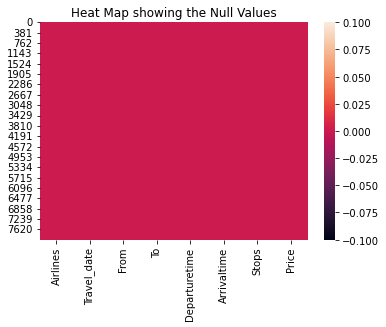

In [15]:
# For visualizing presence of null values using heatmap:-
sns.heatmap(data.isnull())
plt.title("Heat Map showing the Null Values")
plt.show()

In [16]:
# For checking the value counts in all the columns of the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print('----------------')

IndiGo               2757
GoFirst              1942
Vistara              1039
AirIndia              991
AirAsia               701
SpiceJet              417
IndiGo,GoFirst         23
GoFirst,IndiGo         15
IndiGo,AirAsia         13
Vistara,GoFirst        11
AirAsia,GoFirst        10
AirAsia,IndiGo         10
Vistara,IndiGo          8
AirIndia,GoFirst        7
IndiGo,AirIndia         7
GoFirst,AirIndia        6
Vistara,AirIndia        4
SpiceJet,GoFirst        4
GoFirst,AirAsia         4
IndiGo,Vistara          3
SpiceJet,IndiGo         3
Vistara,AirAsia         3
AirAsia,SpiceJet        3
IndiGo,StarAir          2
SpiceJet,AirIndia       2
StarAir                 2
AirIndia,IndiGo         1
StarAir,IndiGo          1
SpiceJet,AirAsia        1
IndiGo,SpiceJet         1
GoFirst,Vistara         1
AirAsia,AirIndia        1
AirIndia,SpiceJet       1
AirIndia,AirAsia        1
Name: Airlines, dtype: int64
----------------
31/05/2022    1221
16/03/2022    1161
01/03/2022    1153
31/03/2022   

As seen, in Airlines columns we can see that IndiGo is having most no. of flights followed by GoFirst and Vistara.

In, From and To column it is seen that maximum number of flights are operating from New Delhi followed by Mumbai and Bengaluru.

In Stops Column,it is observed that almost 40 % of flights operate Nonstop followed by one stop and very few flights operate with more than one stop.

In [17]:
# For grouping all Connecting Airlines columns to connecting flights:-
data["Airlines"].replace(("IndiGo,GoFirst","GoFirst,IndiGo","IndiGo,AirAsia","Vistara,GoFirst","AirAsia,GoFirst","AirAsia,IndiGo","Vistara,IndiGo","AirIndia,GoFirst"))

0       AirAsia
1       AirAsia
2       AirAsia
3       AirAsia
4       AirAsia
         ...   
7990     IndiGo
7991    GoFirst
7992    Vistara
7993    GoFirst
7994    GoFirst
Name: Airlines, Length: 7995, dtype: object

In [18]:
# For checking unique values in airline column:-
data.Airlines.unique()

array(['AirAsia', 'GoFirst', 'IndiGo', 'SpiceJet', 'AirIndia', 'Vistara',
       'AirIndia,GoFirst', 'IndiGo,GoFirst', 'Vistara,GoFirst', 'StarAir',
       'GoFirst,IndiGo', 'SpiceJet,IndiGo', 'IndiGo,AirAsia',
       'IndiGo,Vistara', 'AirAsia,GoFirst', 'Vistara,IndiGo',
       'AirAsia,IndiGo', 'SpiceJet,GoFirst', 'IndiGo,AirIndia',
       'AirIndia,IndiGo', 'StarAir,IndiGo', 'GoFirst,AirIndia',
       'Vistara,AirAsia', 'AirAsia,SpiceJet', 'SpiceJet,AirAsia',
       'IndiGo,SpiceJet', 'GoFirst,Vistara', 'IndiGo,StarAir',
       'SpiceJet,AirIndia', 'AirAsia,AirIndia', 'Vistara,AirIndia',
       'AirIndia,SpiceJet', 'AirIndia,AirAsia', 'GoFirst,AirAsia'],
      dtype=object)

In [19]:
# For grouping all 1stop flights to column 1stop:-
data['Stops'].replace(("1stopviaGoa","1stopviaMumbai","1stopviaNewDelhi","1stopviaHyderabad","1stopviaBengaluru","1stopviaGoa ","1stopviaChennai","1stopviaAhmedabad"))

0       1stopviaRanchi
1       1stopviaRanchi
2       1stopviaRanchi
3       1stopviaRanchi
4       1stopviaRanchi
             ...      
7990      1stopviaPune
7991      1stopviaPune
7992      1stopviaPune
7993      1stopviaPune
7994      1stopviaPune
Name: Stops, Length: 7995, dtype: object

In [20]:
data['Stops'].replace(("2stopviaMumbai,NewDelhi","2stopviaNewDelhi,Mumbai","2stopviaAurangabad,NewDelhi","2stopviaHyderabad,Bengaluru","2stopviaHyderabad,Mysorore"))

0          1stopviaRanchi
1          1stopviaRanchi
2             1stopviaGoa
3             1stopviaGoa
4       1stopviaBengaluru
              ...        
7990       1stopviaMumbai
7991    1stopviaBengaluru
7992     1stopviaNewDelhi
7993     1stopviaNewDelhi
7994     1stopviaNewDelhi
Name: Stops, Length: 7995, dtype: object

In [21]:
data['Stops'].replace(("3stopviaNewDelhi,Hyderabad,Mysore","3stopviaNewDelhi,Indore,Mumbai","3stopviaMysore,Hyderabad,NewDelhi","3stopviaNasik,Pune,Bhopal"))

0          1stopviaRanchi
1          1stopviaRanchi
2             1stopviaGoa
3             1stopviaGoa
4       1stopviaBengaluru
              ...        
7990       1stopviaMumbai
7991    1stopviaBengaluru
7992     1stopviaNewDelhi
7993     1stopviaNewDelhi
7994     1stopviaNewDelhi
Name: Stops, Length: 7995, dtype: object

In [22]:
data['Stops'].replace(("4stopviaNasik,Pune,Bhopal,NewDelhi"),"4Stops",inplace=True)

In [23]:
# For checking unique values in Stops column:-
data.Stops.unique()

array(['1stopviaRanchi', '1stopviaGoa', '1stopviaBengaluru',
       '1stopviaJaipur', '1stopviaPatna', '1stopviaLucknow',
       '1stopviaVaranasi', 'Nonstop', '1stopviaJodhpur', '1stopviaIndore',
       '1stopviaRajkot', '3stopviaKolkata,Aizawl,Guwahati',
       '1stopviaBhopal', '1stopviaAhmedabad', '1stopviaVadodara',
       '1stopviaJabalpur', '1stopviaHyderabad', '1stopviaAurangabad',
       '1stopviaSurat', '1stopviaChandigarh', '1stopviaUdaipur',
       '1stopviaChennai', '1stopviaBhubaneswar',
       '2stopviaKolkata,Bhubaneswar', '2stopviaRanchi,Bengaluru',
       '1stopviaAmritsar', '1stopviaNagpur', '1stopviaKolkata',
       '1stopviaMumbai', '1stopviaBagdogra',
       '3stopviaGuwahati,Imphal,Kolkata',
       '2stopviaVisakhapatnam,Hyderabad', '2stopviaGuwahati,Chennai',
       '1stopviaPune', '1stopviaRaipur', '1stopviaVisakhapatnam',
       '2stopviaGoa,Hyderabad', '2stopviaAurangabad,Mumbai',
       '2stopviaBengaluru,Hyderabad', '2stopviaHyderabad,Mysore',
       '2stop

In [24]:
# For checking the presence of unique values present in each column:-
data.nunique()

Airlines           34
Travel_date         7
From                6
To                  6
Departuretime     268
Arrivaltime       272
Stops             101
Price            1966
dtype: int64

In [25]:
# For checking the null values in dataset again:-
print("Empty cells in Dataset is ",data.isna().values.any())
print("\nColumnwise Empty cell\n")
print(data.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell

Airlines         0
Travel_date      0
From             0
To               0
Departuretime    0
Arrivaltime      0
Stops            0
Price            0
dtype: int64


In [26]:
# For changing datatype of column Travel_date from object to datetime:-
data['Travel_date']=pd.to_datetime(data['Travel_date'])

In [27]:
# For separating Date, Month and Year to simplify data for analysis further:-
data['Date']=pd.to_datetime(data.Travel_date,format='%d%m%y').dt.day
data['Month']=pd.to_datetime(data.Travel_date,format='%d%m%y').dt.month
data['Year']=pd.to_datetime(data.Travel_date,format='%d%m%y').dt.year

In [28]:
# For dropping the column Travel_date to avoid duplication in dataset:-
data.drop(['Travel_date'],axis=1, inplace=True)

In [29]:
# For checking the data after removing ans splitting column:-
data.head()

,Airlines,From,To,Departuretime,Arrivaltime,Stops,Price,Date,Month,Year
0,AirAsia,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953,3,1,2022
1,AirAsia,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953,3,1,2022
2,AirAsia,NewDelhi,Mumbai,20:00,02:25,1stopviaGoa,5953,3,1,2022
3,AirAsia,NewDelhi,Mumbai,12:20,02:25,1stopviaGoa,5953,3,1,2022
4,AirAsia,NewDelhi,Mumbai,20:45,07:15,1stopviaBengaluru,5953,3,1,2022


In [31]:
# For displaying unique values again after splitting data:-
data.nunique()

Airlines           34
From                6
To                  6
Departuretime     268
Arrivaltime       272
Stops             101
Price            1966
Date                5
Month               4
Year                1
dtype: int64

Here, Year column has only 1 unique value, so it should be dropped as it is not required further for analysis.

In [32]:
data.drop(['Year'],axis=1,inplace=True)

In [33]:
# For converting the datatype of Departuretime and Arrivaltime for object dtype to datetime dtype:-
data["Departuretime"]=pd.to_datetime(data["Departuretime"])
data["Arrivaltime"]=pd.to_datetime(data["Arrivaltime"])

In [34]:
# For seperating hour and minutes from Departuretime:-
data["Departhour"]=pd.to_datetime(data['Departuretime']).dt.hour
data["DepartMin"]=pd.to_datetime(data["Departuretime"]).dt.minute

In [35]:
# For dropping Departuretime to avoid duplicacy of data:-
data=data.drop(['Departuretime'],axis=1)

In [36]:
# For separting Hour and Minutes from Arrivaltime:-
data["Arrivalhour"]=pd.to_datetime(data["Arrivaltime"]).dt.hour
data["Arrivalmin"]=pd.to_datetime(data["Arrivaltime"]).dt.hour

In [37]:
# For dropping Arrivaltime for avoiding duplicacy of data:-
data=data.drop(["Arrivaltime"],axis=1)

# Performing Univariate Analysis:-

In [38]:
# For splitting the columns from datatype object and integer:-
categorical=[]
integer=[]
for i in data.columns:
    if data[i].dtypes=='object':
        categorical.append(i)
    else:
        integer.append(i)
print(categorical)
print("----")
print(integer)

['Airlines', 'From', 'To', 'Stops']
----
['Price', 'Date', 'Month', 'Departhour', 'DepartMin', 'Arrivalhour', 'Arrivalmin']


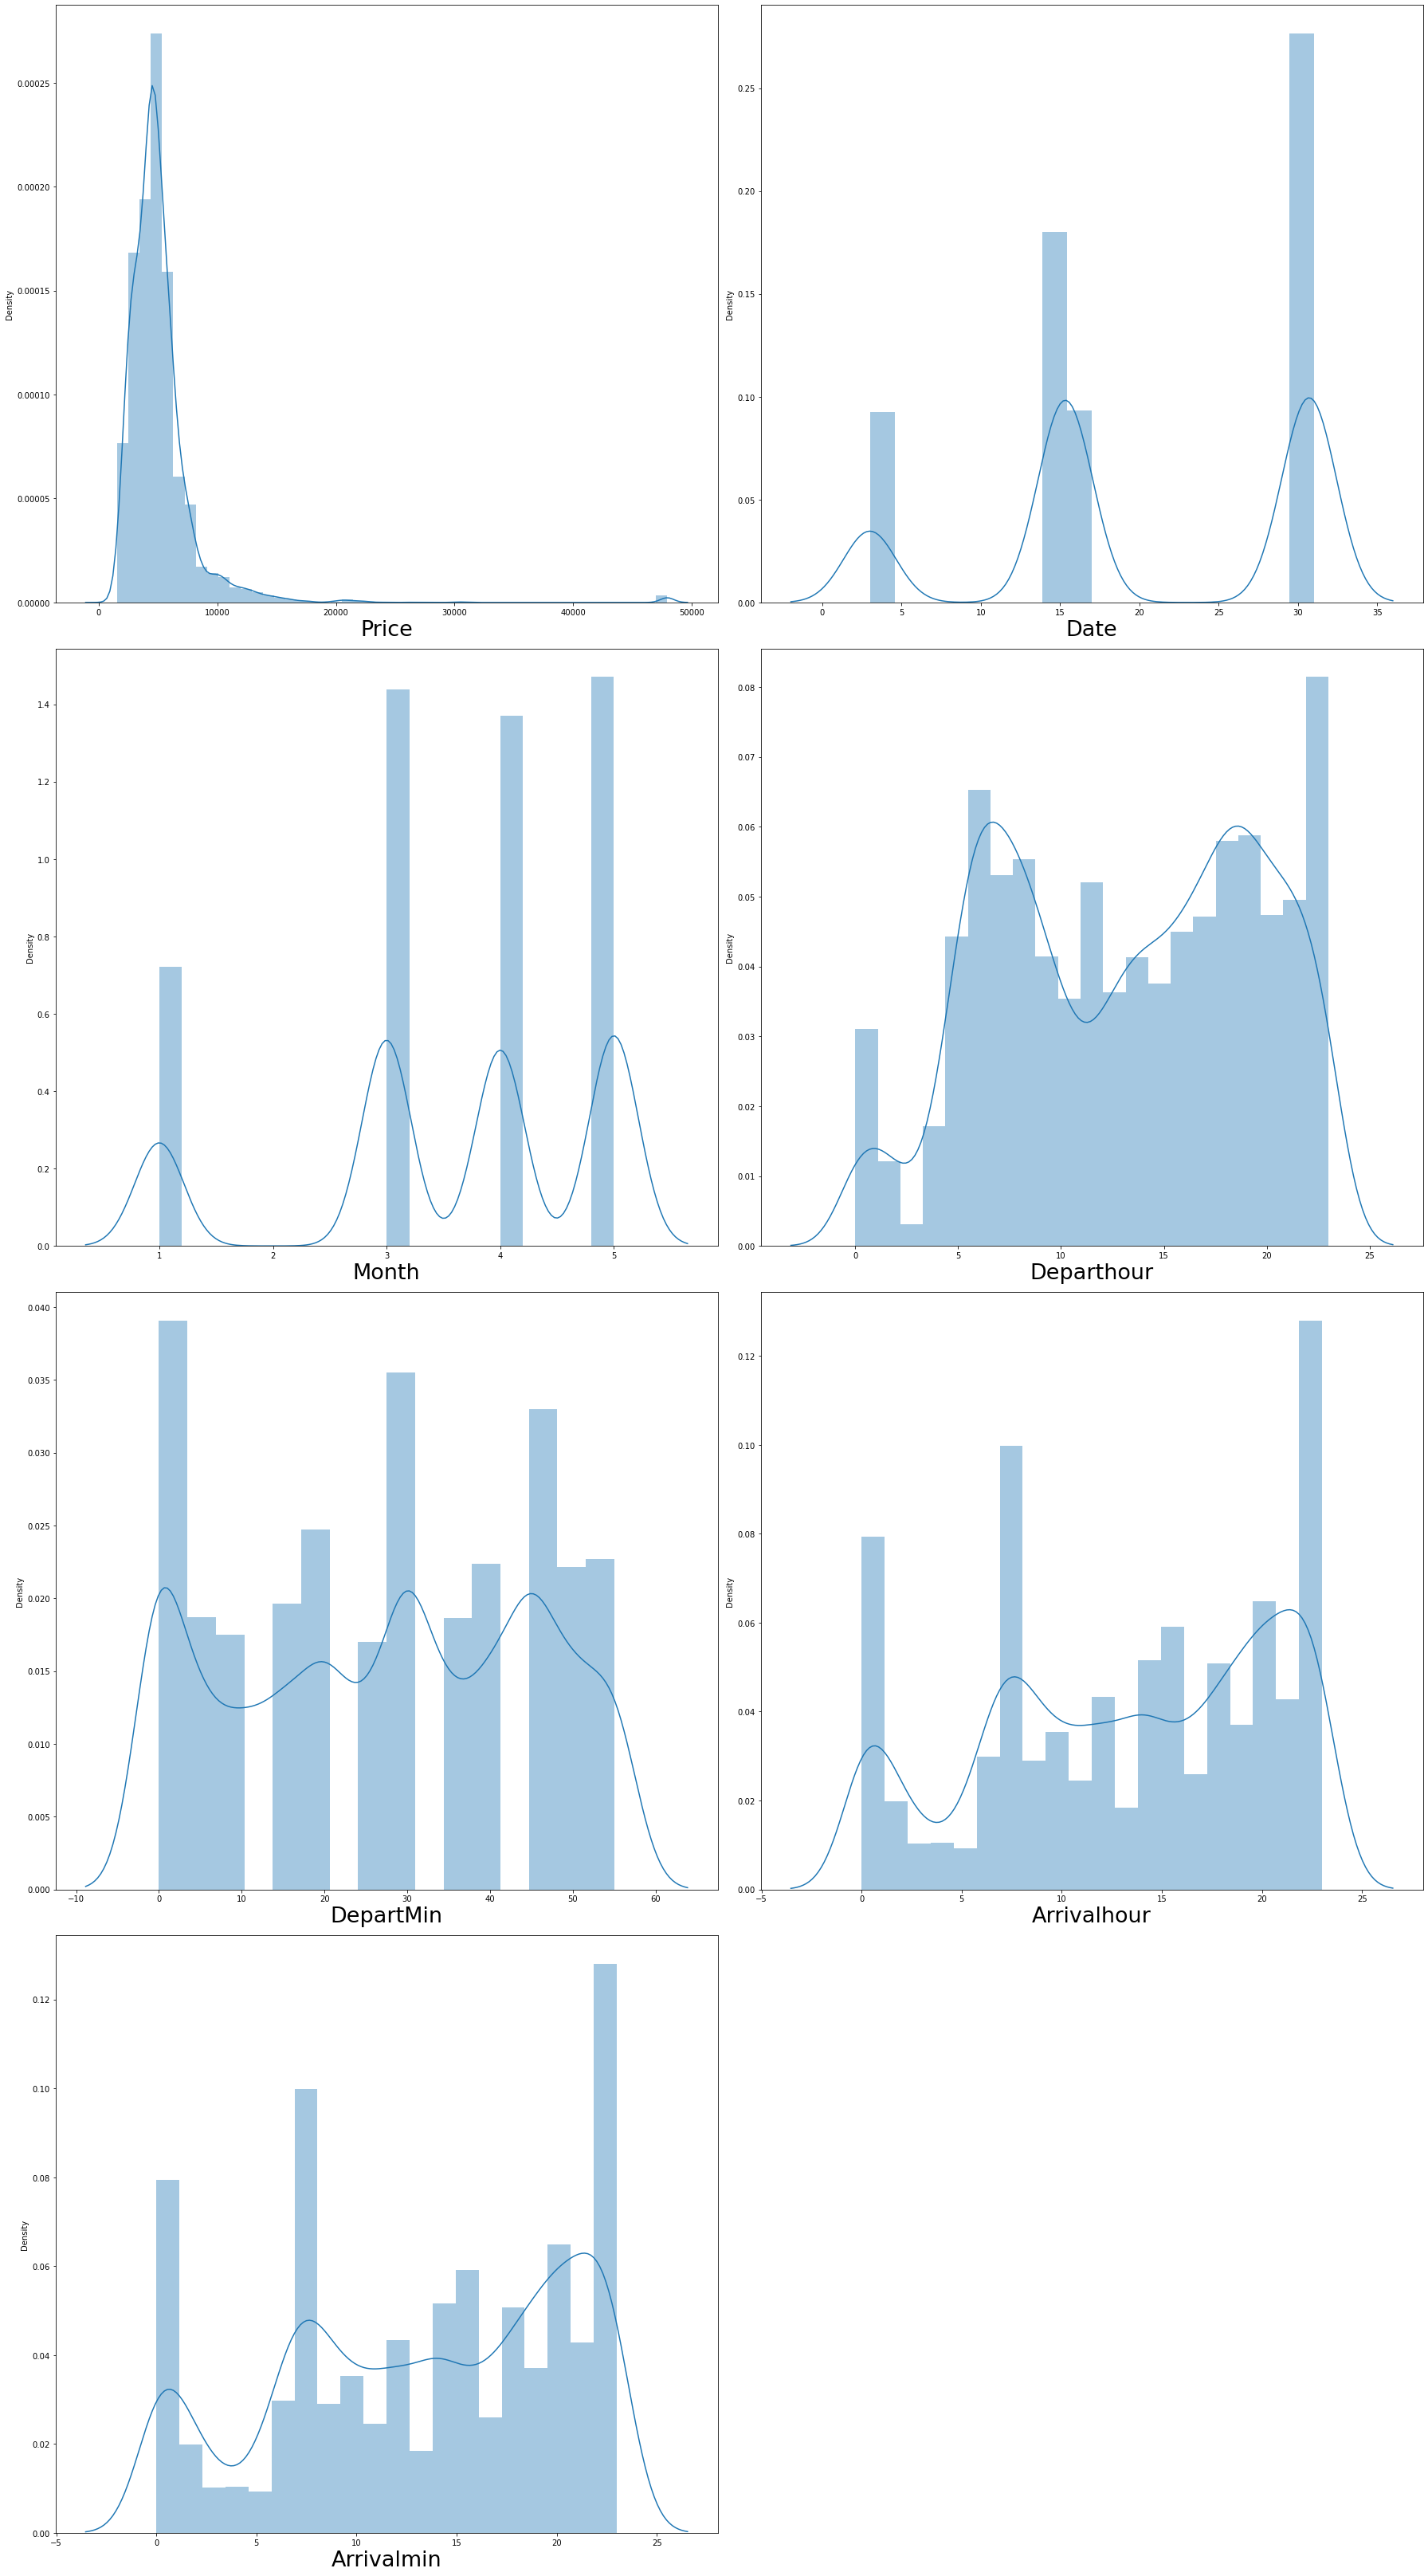

In [39]:
# For visualising all numerical columns using distribution plots:-
plt.figure(figsize=(25,45))
no=1
for i in data[integer]:
    if no <=7:
        ax=plt.subplot(4,2,no)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=27)
    no+=1
plt.tight_layout()

Here, As seen above, there is high skewness present in our Target column Price.
In column, Month and Date some amount of skewness is present.

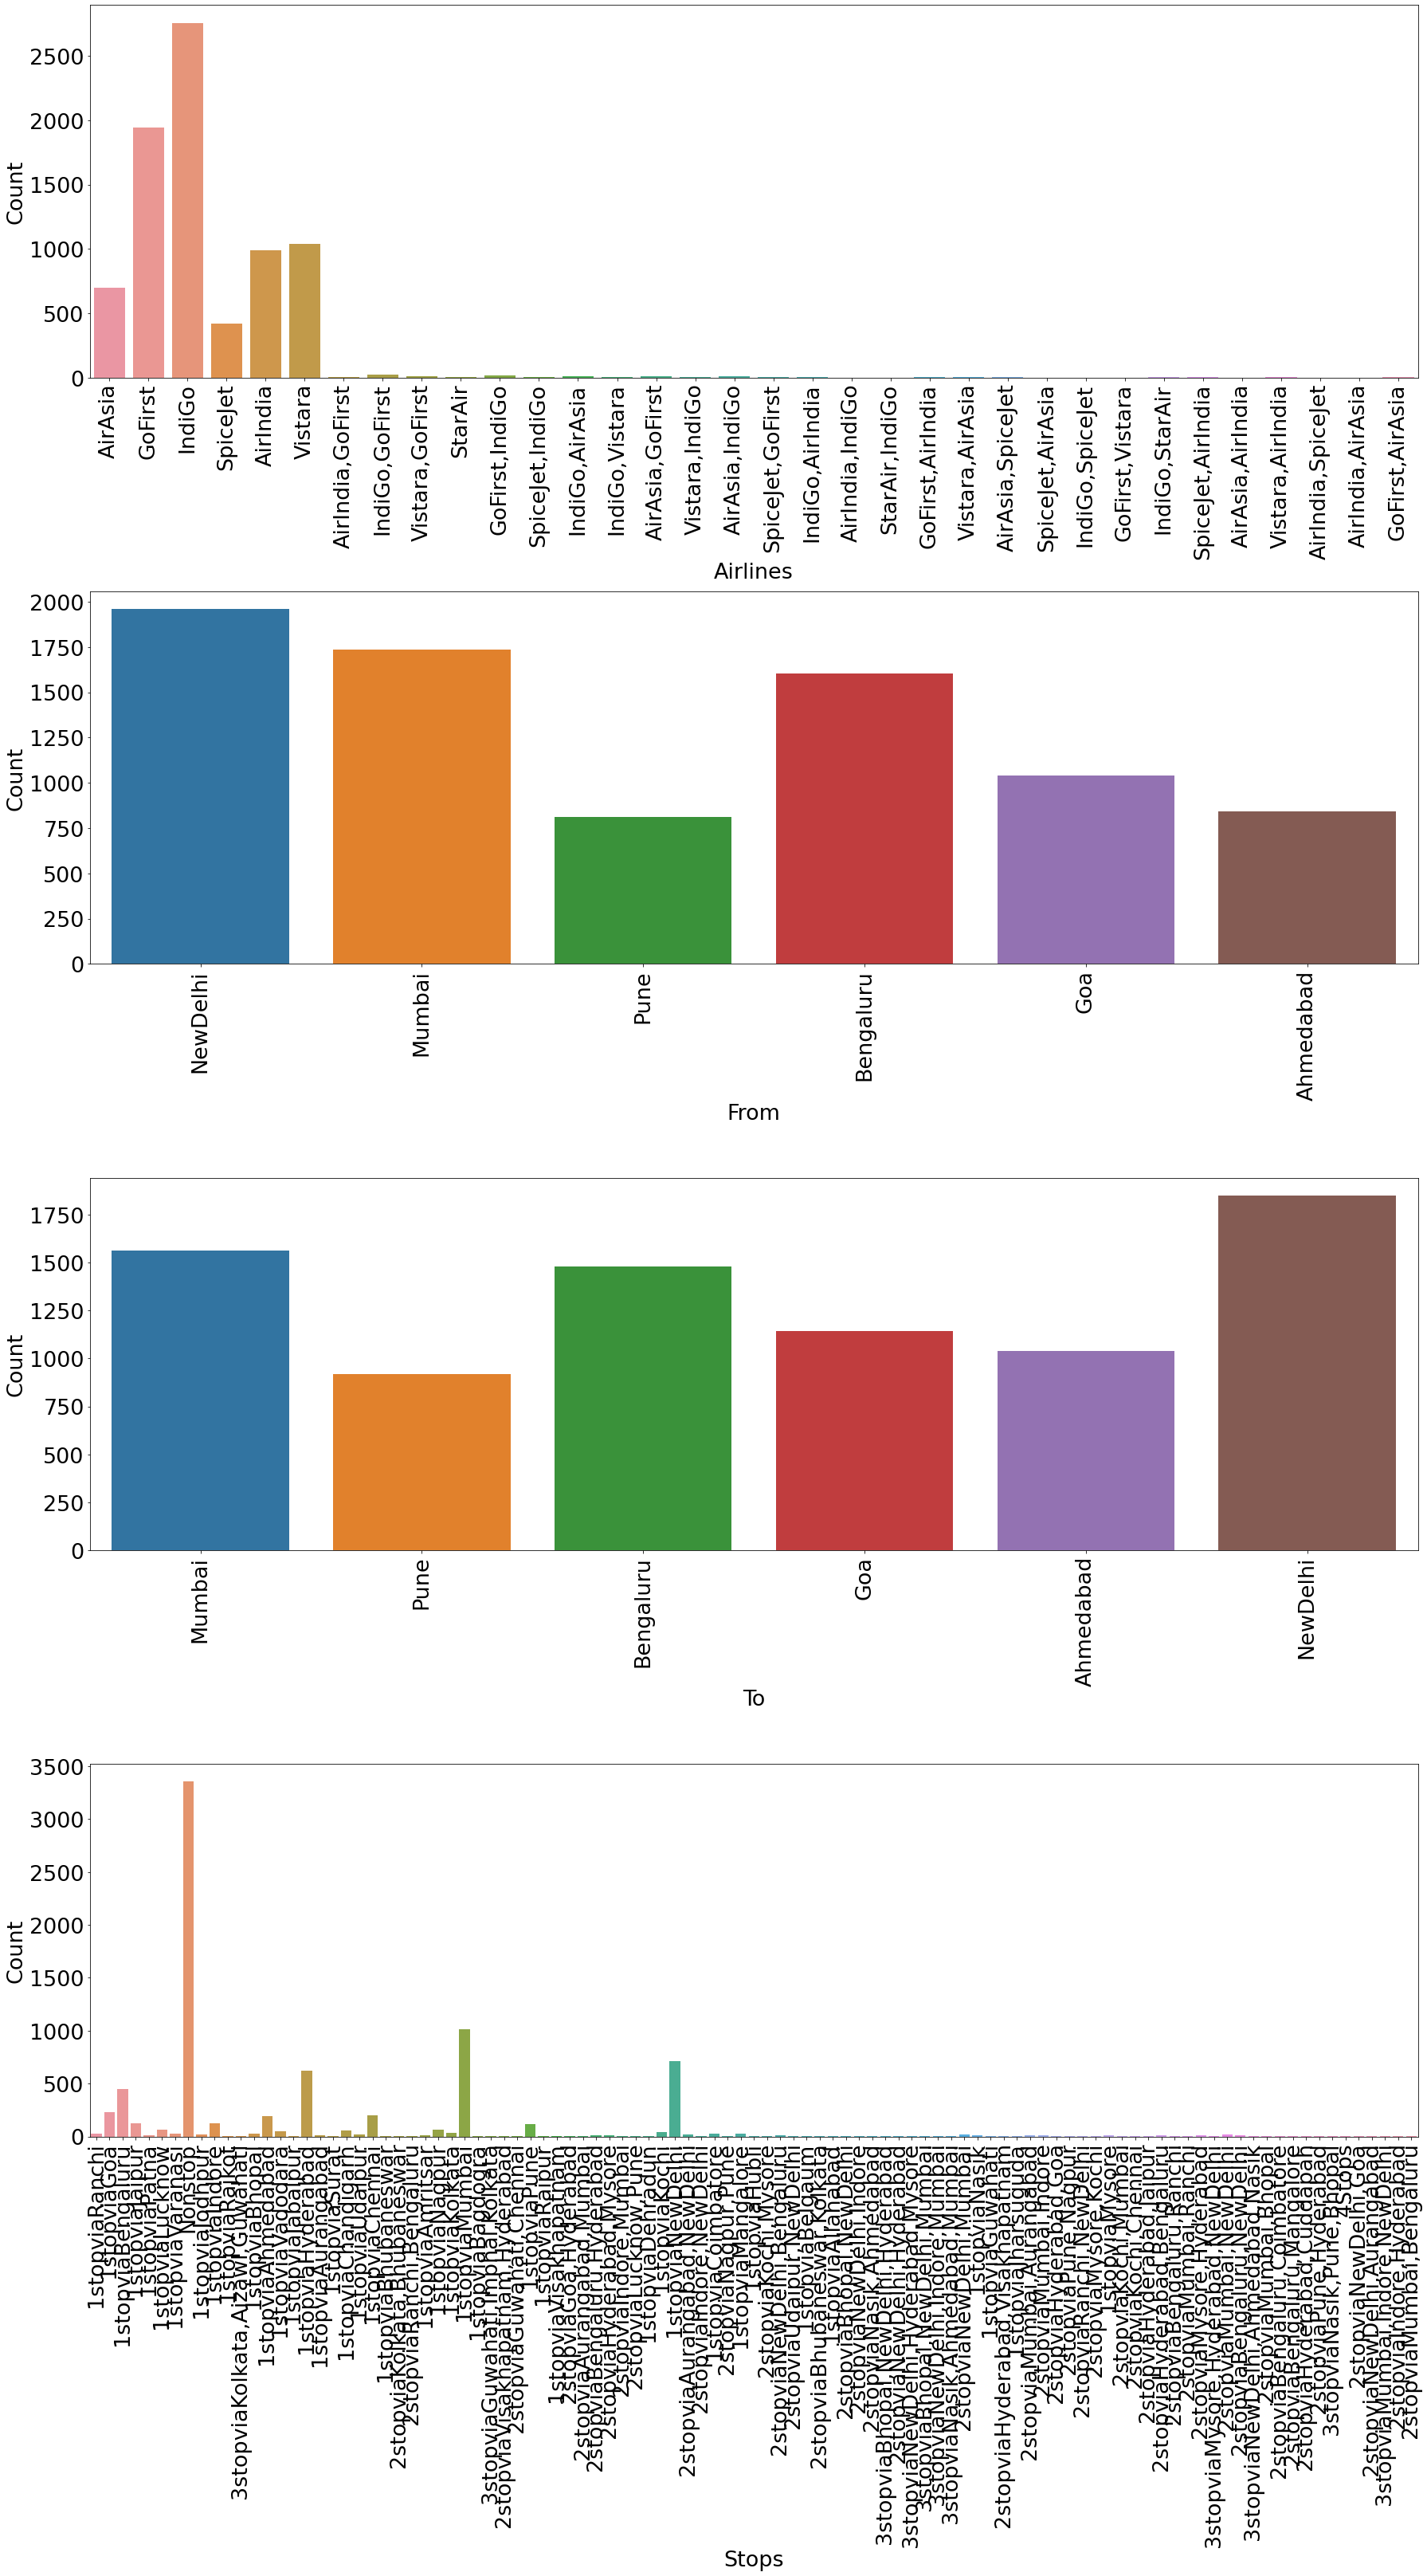

In [40]:
# For Visualizing all categorical columns using count plot:-
plt.figure(figsize=(25,45))
no=1
for i in data[categorical]:
    if no<=4:
        ax=plt.subplot(4,1,no)
        sns.countplot(data[i])
        plt.xticks(rotation=90, fontsize=27)
        plt.yticks(fontsize=27)
        plt.xlabel(i,fontsize=27)
        plt.ylabel("Count",fontsize=27)
    no+=1
plt.tight_layout()

# Bivariate Analysis:-

In [47]:
# For making list of integer column without our target column:-
integercol=['Date', 'Month', 'Departhour', 'DepartMin', 'Arrivalhour', 'Arrivalmin']

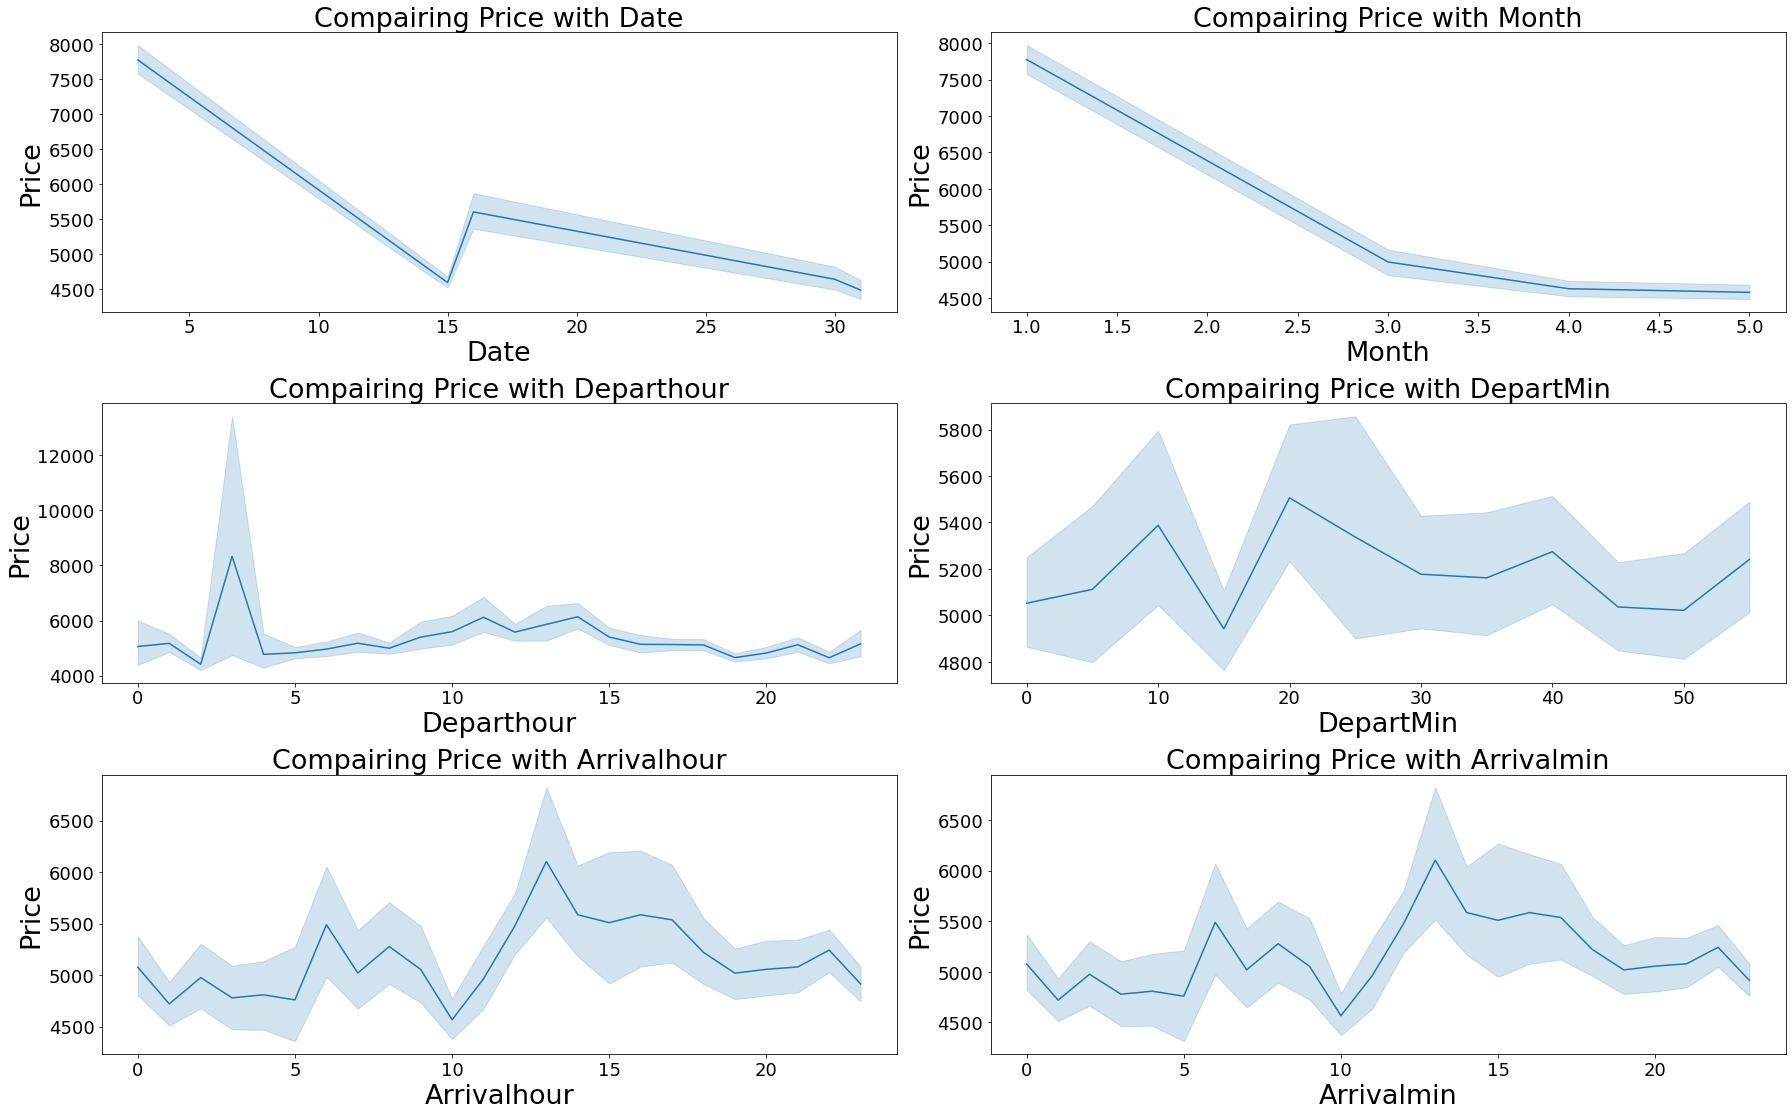

In [48]:
# For comparing Date with our target column Price:-
plt.figure(figsize=(25,20))
for i in range(len(integercol)):
    plt.subplot(4,2,i+1)
    sns.lineplot(x=data[integercol[i]], y=data['Price'])
    plt.title(f"Compairing Price with {integercol[i]}", fontsize=27)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(integercol[i],fontsize=27)
    plt.ylabel('Price', fontsize=27)
    plt.tight_layout()

Here, it is seen that there are chances of getting cheaper ticket for same destination if we plan well in advance. 
Closer the date of travelling comes, Higher the prices we have to pay for travelling.

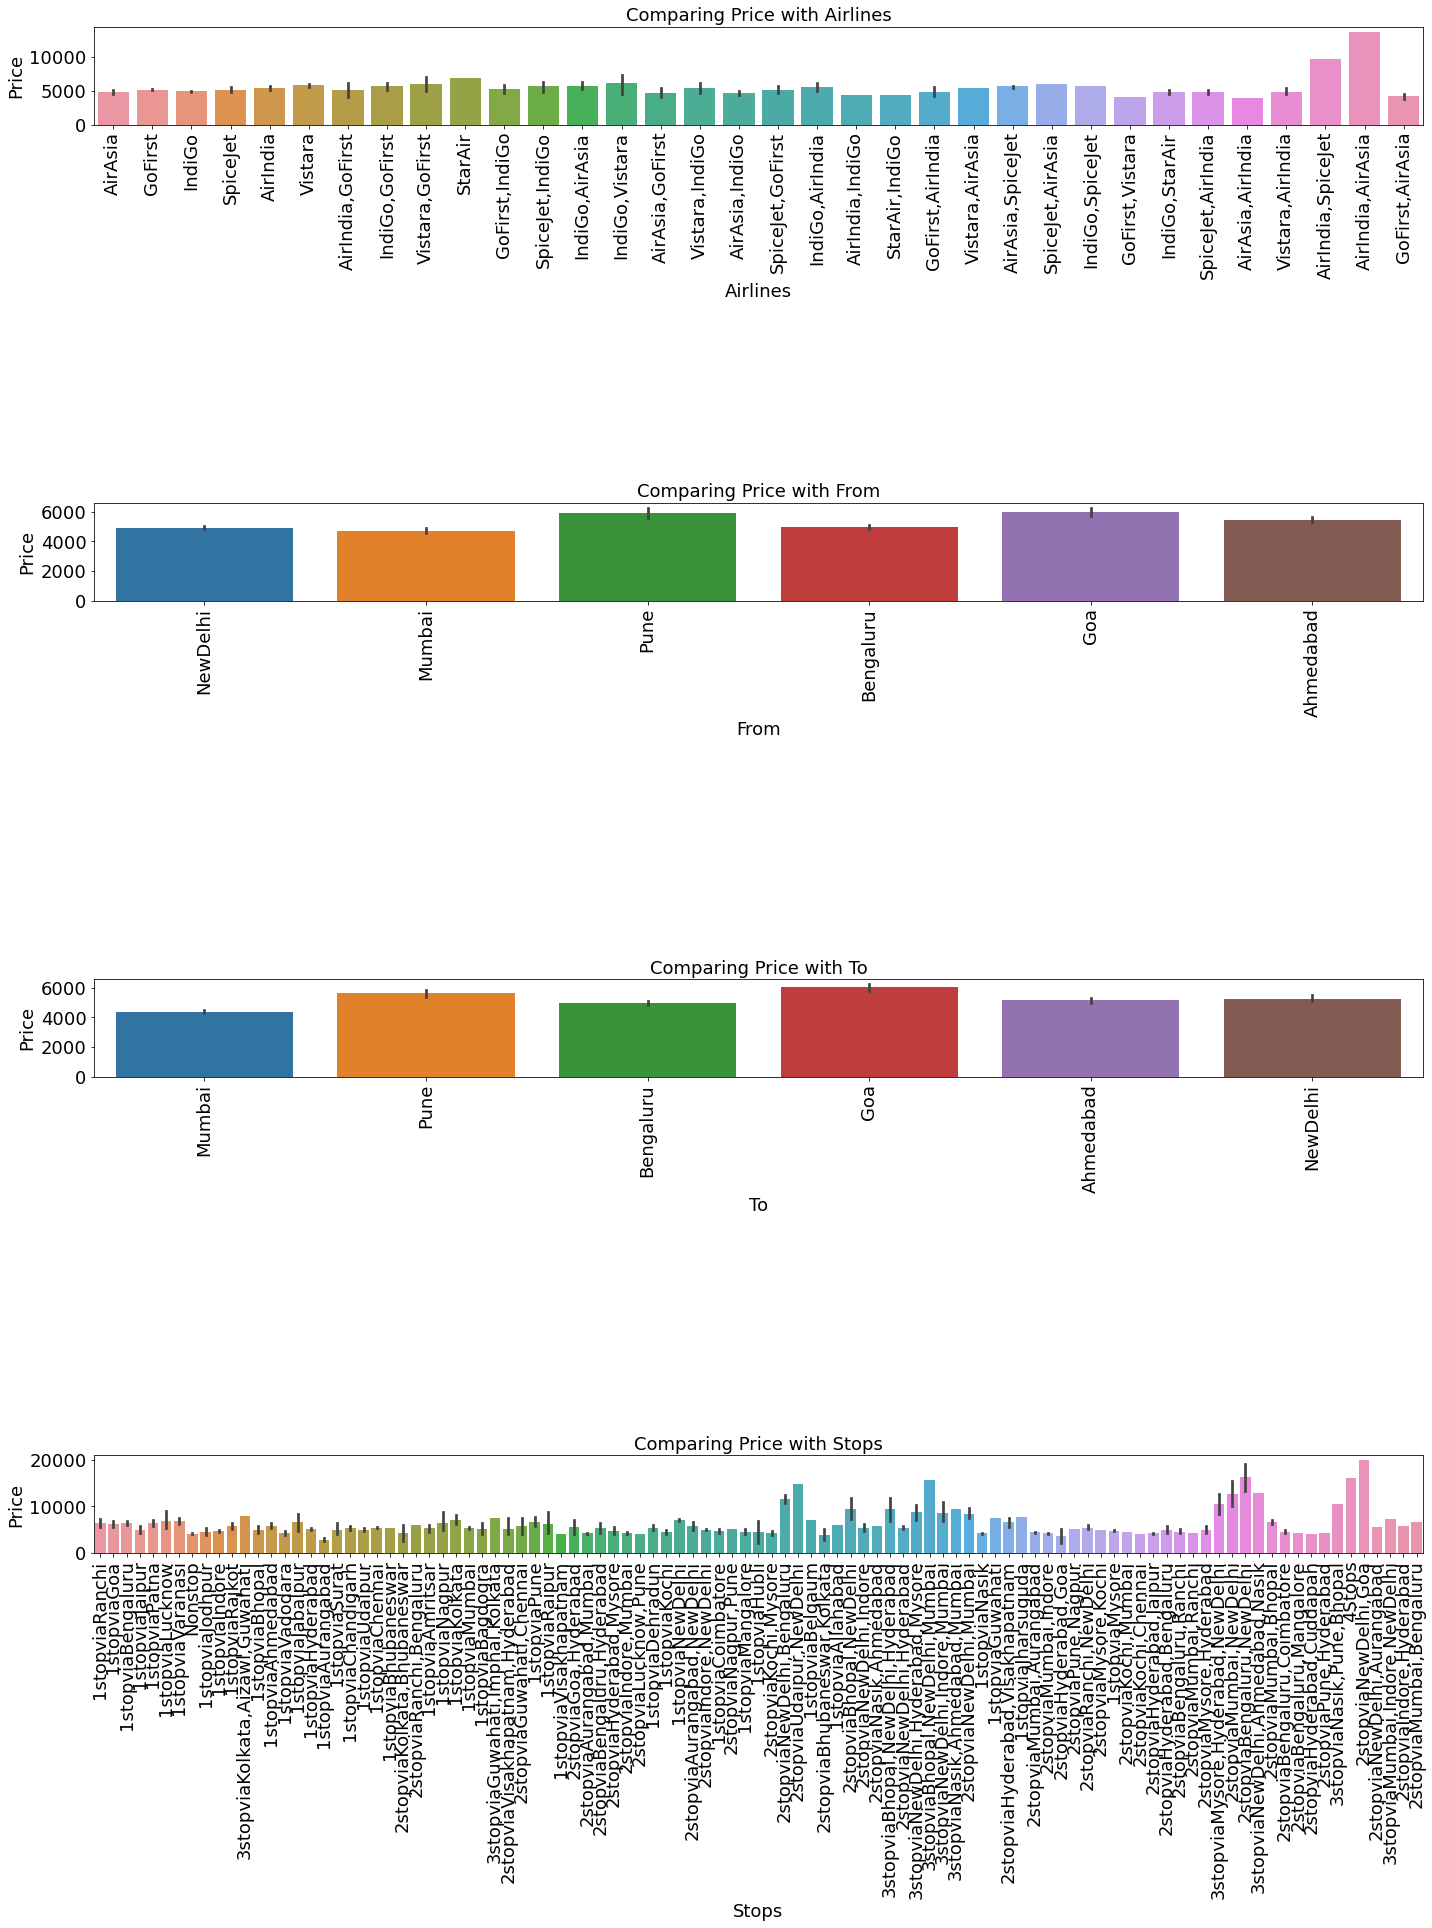

In [50]:
# For comparing all categorical columns with our target column:-
plt.figure(figsize=(20,35))
for i in range(len(categorical)):
    plt.subplot(6,1,i+1)
    sns.barplot(x=data[categorical[i]],y=data['Price'])
    plt.title(f"Comparing Price with {categorical[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(categorical[i],fontsize=18)
    plt.ylabel('Price',fontsize=18)
    plt.tight_layout()

Here in first Bar plot, it is clearly seen that prices of tickets for direct non stop flights is cheaper as compared to one stop or more.

In second Bar plot, it is seen that prices of tickets for flights starting from Mumbai is cheaper compared to other cities, followed by Delhi, and Bengaluru.

# Multivariate Analysis:-

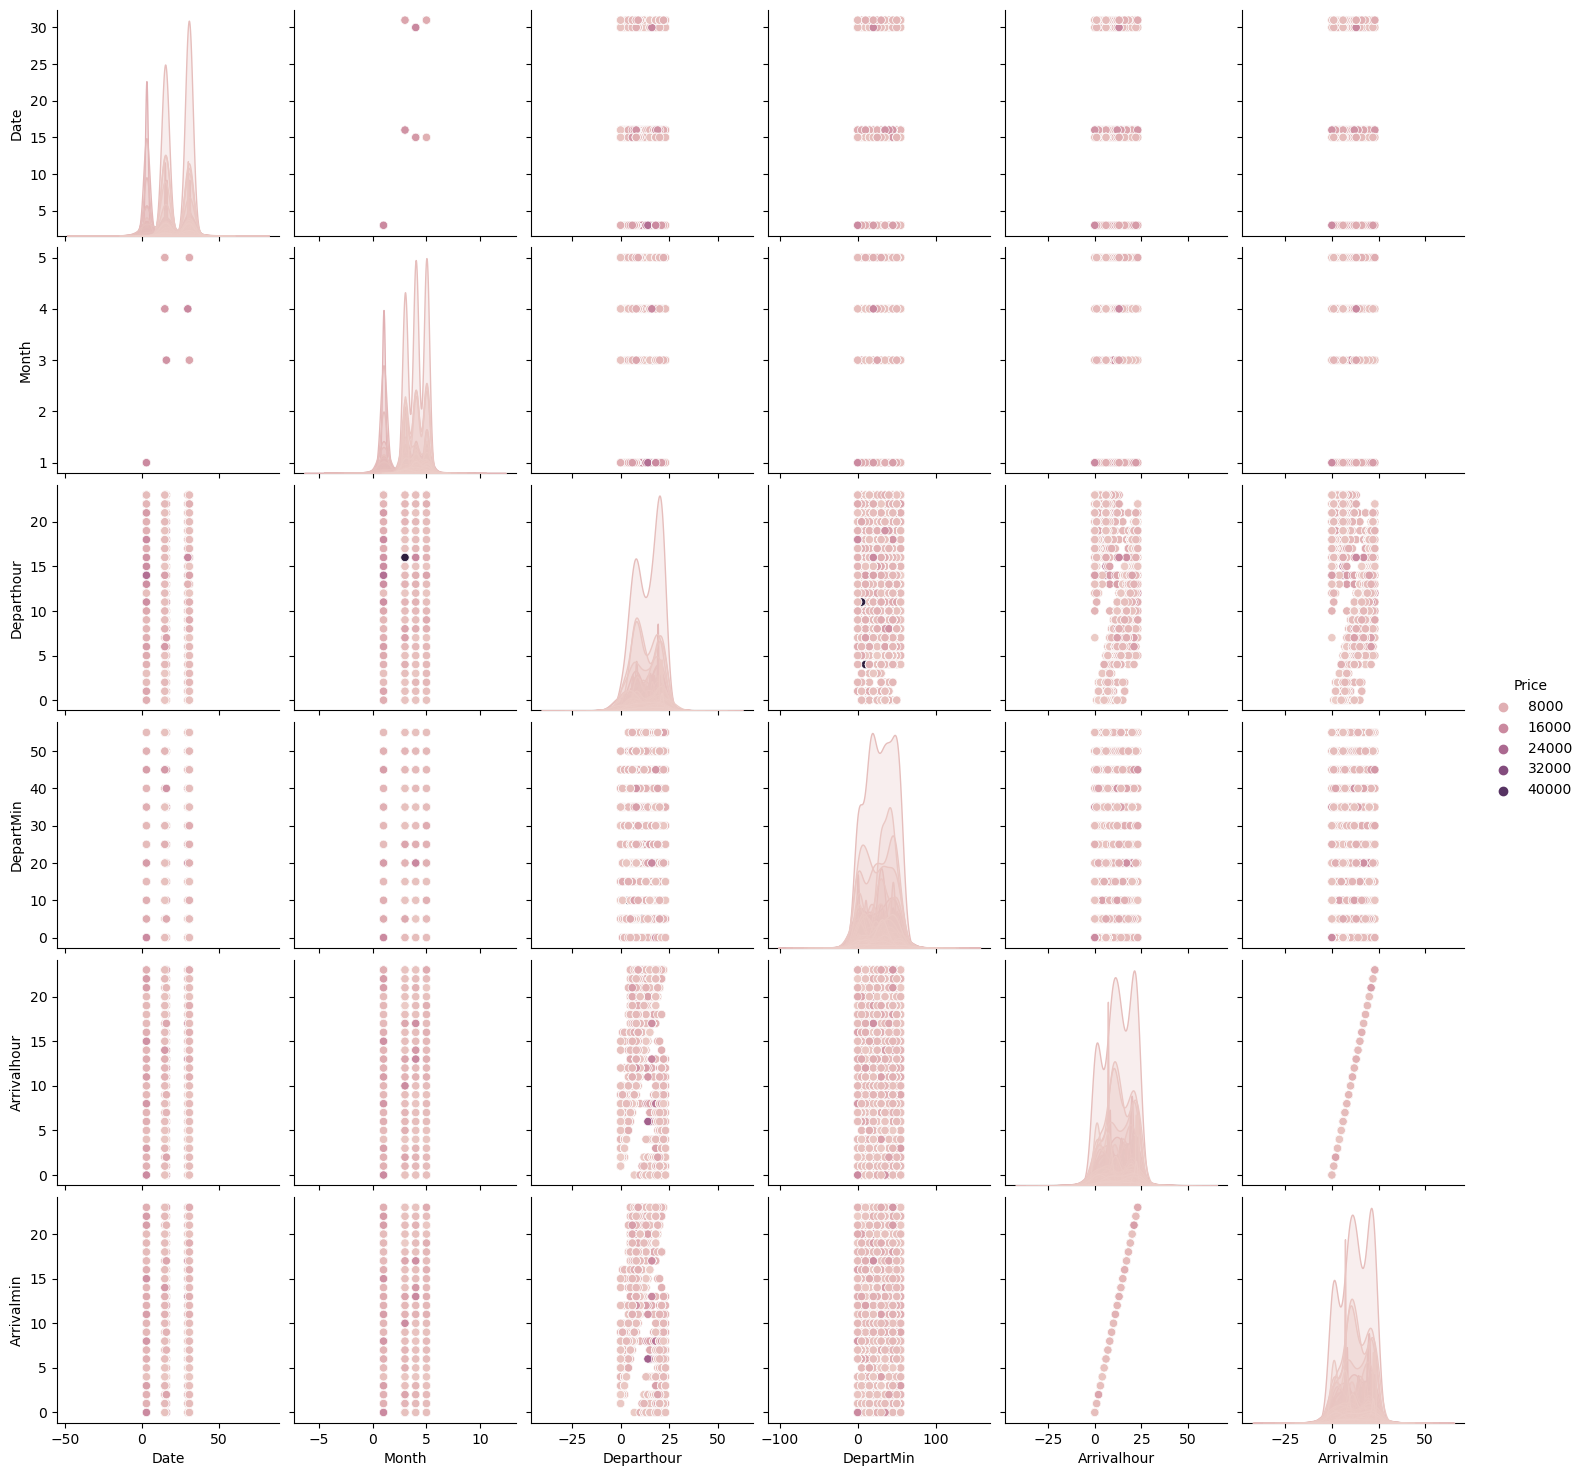

In [51]:
# For visualizing relationship among all the columns in the dataset:-
plt.style.use('default')
a=sns.pairplot(data,hue='Price',diag_kind='kde')
for ac in a.axes.flat:
    ax.tick_params('x',labelrotation=90)
plt.show()

In [52]:
# For checking correlation among dataset:-
corr=data.corr()

In [53]:
corr

,Price,Date,Month,Departhour,DepartMin,Arrivalhour,Arrivalmin
Price,1.000000,-0.254872,-0.278998,-0.014346,-0.000409,0.014264,0.014264
Date,-0.254872,1.000000,0.568062,-0.008190,0.026602,0.013613,0.013613
Month,-0.278998,0.568062,1.000000,-0.007432,0.026319,0.024015,0.024015
Departhour,-0.014346,-0.008190,-0.007432,1.000000,0.037625,0.071158,0.071158
DepartMin,-0.000409,0.026602,0.026319,0.037625,1.000000,0.001410,0.001410
Arrivalhour,0.014264,0.013613,0.024015,0.071158,0.001410,1.000000,1.000000
Arrivalmin,0.014264,0.013613,0.024015,0.071158,0.001410,1.000000,1.000000


<AxesSubplot:>

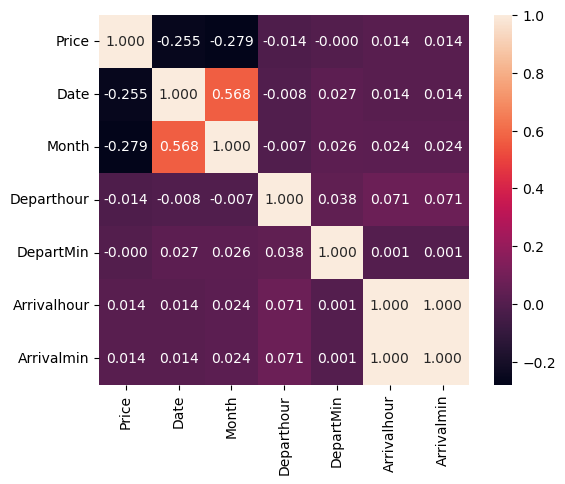

In [54]:
sns.heatmap(data.corr(),annot=True, square=True, fmt='0.3f')

Here, Date and Month column are negatively correlated with Target column.

<AxesSubplot:>

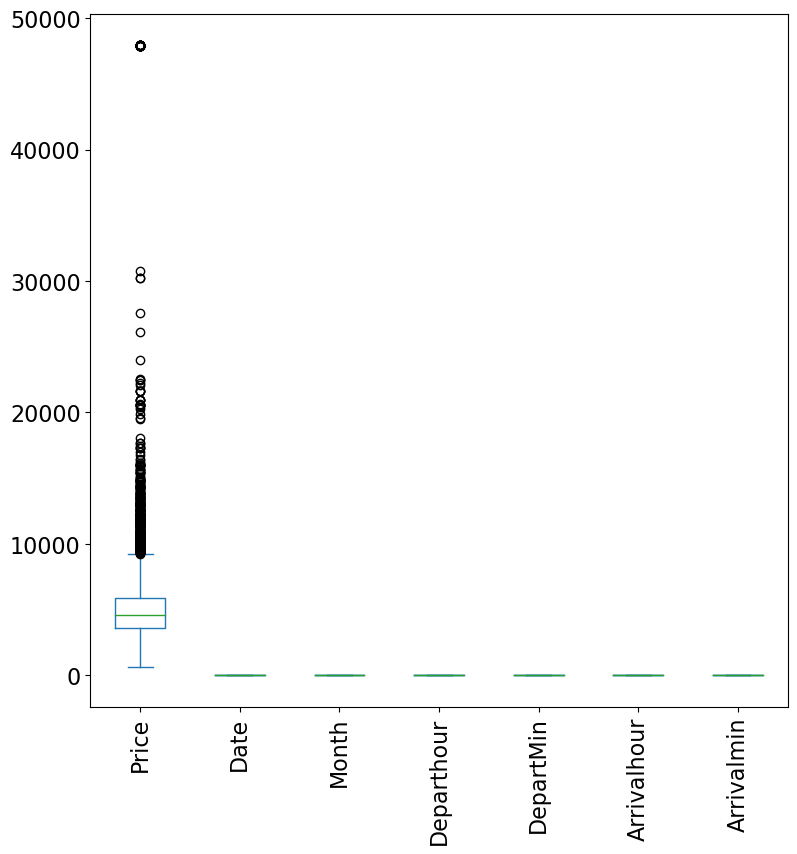

In [56]:
# For checking presence of outliers using boxplot:-
data.plot(rot=90,kind='box',fontsize=16,figsize=(9,9))

Here as seen above, outliers are present only in Target column, so it will not be removed as it will affect model accuracy.

In [57]:
# For checking the skewness levels in dataset:-
data.skew()

Price          7.162827
Date          -0.272942
Month         -0.740448
Departhour    -0.172743
DepartMin     -0.092191
Arrivalhour   -0.334043
Arrivalmin    -0.334043
dtype: float64

In [58]:
# For removing skewness using yeo-johnson method:
feature=["Month"]

In [59]:
# For implimenting yeo-johnson method:-
from sklearn.preprocessing import PowerTransformer
test_scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [60]:
data[feature]=test_scaler.fit_transform(data[feature].values)

In [61]:
# For checking the skewness once again:-
data.skew()

Price          7.162827
Date          -0.272942
Month         -0.272213
Departhour    -0.172743
DepartMin     -0.092191
Arrivalhour   -0.334043
Arrivalmin    -0.334043
dtype: float64

# Encoding Techniques:-

In [62]:
# For importing neccessary libraries and converting dtype using labelEncoder:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[categorical]=data[categorical].apply(le.fit_transform)
data[categorical].head()

,Airlines,From,To,Stops
0,0,4,3,35
1,0,4,3,35
2,0,4,3,13
3,0,4,3,13
4,0,4,3,6


# Model Building:-

In [63]:
# For assigning values to x and y for training and testing our dataset:-
x=data.drop('Price',axis=1)
y=data['Price']

In [64]:
# For importing required libraries for scaling data :-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1.head()

,Airlines,From,To,Stops,Date,Month,Departhour,DepartMin,Arrivalhour,Arrivalmin
0,-1.661122,0.908435,0.277387,-0.502629,-1.714481,-1.739882,-0.815339,-0.408182,0.103407,0.103407
1,-1.661122,0.908435,0.277387,-0.502629,-1.714481,-1.739882,-0.815339,-0.408182,0.103407,0.103407
2,-1.661122,0.908435,0.277387,-1.055217,-1.714481,-1.739882,1.090648,-1.531946,-1.586403,-1.586403
3,-1.661122,0.908435,0.277387,-1.055217,-1.714481,-1.739882,-0.180010,-0.408182,-1.586403,-1.586403
4,-1.661122,0.908435,0.277387,-1.231040,-1.714481,-1.739882,1.090648,0.996524,-0.882315,-0.882315


Data has been scaled properly.

In [65]:
# For finding Best Random state and Accuracy and importing all required libraries for model selection:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [66]:
Max_acc=0
Max_rs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=i)
    Model=RandomForestRegressor()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best Accuracy: ",Max_acc, "On Random_state: ",Max_rs)

Best Accuracy:  0.6235354272276046 On Random_state:  111


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=111 )

# Regression Model Building:-


In [72]:
# For importing all required libraries for model selection:-
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [75]:
ModelB=[LinearRegression(),KNN(),SVR(),RandomForestRegressor(),ExtraTreesRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]
for i in ModelB:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy Score :",i,"is", i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
    print("Root mean Squared Error: ", (mean_squared_error(y_test,pred))**0.5)
    print("r2 Score: ",r2_score(y_test,pred))
    
    print("----------")
    print("\n\n")

Accuracy Score : LinearRegression() is 0.1291232020712504

Error
Mean Absolute Error:  1521.8436214282576
Root mean Squared Error:  3191.843739970436
r2 Score:  0.16555433728544744
----------



Accuracy Score : KNeighborsRegressor() is 0.5055308720871929

Error
Mean Absolute Error:  1266.3557315548144
Root mean Squared Error:  3016.0471038494406
r2 Score:  0.2549403264263328
----------



Accuracy Score : SVR() is -0.003201870631363235

Error
Mean Absolute Error:  1692.1421859933428
Root mean Squared Error:  3508.3864964192708
r2 Score:  -0.008160504111505817
----------



Accuracy Score : RandomForestRegressor() is 0.9100061617445917

Error
Mean Absolute Error:  824.0896917068619
Root mean Squared Error:  2122.894659002022
r2 Score:  0.6308764901717837
----------



Accuracy Score : ExtraTreesRegressor() is 0.9993582531168671

Error
Mean Absolute Error:  716.7669237182159
Root mean Squared Error:  1920.5125399891092
r2 Score:  0.6979011219469474
----------



Accuracy Score : AdaBoos

Here, ExtraTrees Is giving highest R2 score of 69.7 %.

# Cross Validation Phase:-


In [76]:
# For importing required libraries for cross validation:-
from sklearn.model_selection import cross_val_score
for j in ModelB:
    cvs=cross_val_score(j,x_train,y_train,cv=15).mean()
    print("Score of ",j, "is", cvs)

Score of  LinearRegression() is 0.13305879841739204
Score of  KNeighborsRegressor() is 0.22093116706389848
Score of  SVR() is -0.005302407812317745
Score of  RandomForestRegressor() is 0.36021118885038017
Score of  ExtraTreesRegressor() is 0.4425417741307501
Score of  AdaBoostRegressor() is -0.16336972815306158
Score of  GradientBoostingRegressor() is 0.2813503638859759
Score of  Lasso() is 0.1331567665519984
Score of  Ridge() is 0.1331272865715434
Score of  ElasticNet() is 0.12192180646303434


So, Based on R2 score and cross validation score, ExtraTreesRegressor is giving least difference,So, ExtraTreesRegressor is  our best model and will hypertune it for best accuracy.

# Hyper Parameter Tuning:-

In [77]:
# For importing all required libraries:-
from sklearn.model_selection import GridSearchCV

In [78]:
ExtraT=ExtraTreesRegressor()
parameter={'n_estimators':[10,50,100],'max_depth':[2,8,16],'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':[223]}
search=GridSearchCV(ExtraT,parameter)
search.fit(x_train,y_train)          

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 8, 16],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100], 'random_state': [223]})

In [79]:
print(search.best_params_)

{'criterion': 'mae', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 223}


In [81]:
ExtraTR=ExtraTreesRegressor(n_estimators=100, max_depth=16, criterion='mae',max_features='auto',random_state=223)
ExtraTR.fit(x_train,y_train)
ExtraTR.score(x_train,y_train)
pred=ExtraTR.predict(x_test)
print("Accuracy Score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error: ",(mean_squared_error(y_test,pred)**0.5))

Accuracy Score:  0.7074952211639535
Mean Absolute Error:  688.4475510629428
Root Mean Squared Error:  1889.7705380588582


Here, the accuracy score is now coming 71 % 

# Saving the Model:-

In [82]:
# For importing librariesfor saving model:- 
import pickle
Name="FlightPricePredictions.pkl"
pickle.dump(ExtraTR,open(Name,'wb'))

# Loading the Model:-

In [83]:
# For loading model:-
Models=pickle.load(open(Name,'rb'))

In [84]:
# For displaying predictions:-
prediction=Models.predict(x_test)
prediction

array([6924.78 , 4723.44 , 3945.925, ..., 2531.155, 2003.12 , 3011.77 ])

In [86]:
pd.DataFrame([Models.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398
Predicted,6924.78,4723.44,3945.925,5979.135,6098.555,3453.015,9268.04,3727.645,4384.095,3413.56,...,3000.98,4495.865,6352.44,6295.345,3344.305,4992.17,5502.805,2531.155,2003.12,3011.77
Actual,5953.00,4266.00,3861.000,5966.000,4413.000,3441.000,11721.00,3228.000,4052.000,3000.00,...,3001.00,4500.000,6894.00,7081.000,3540.000,5060.00,5576.000,2791.000,2000.00,3002.00


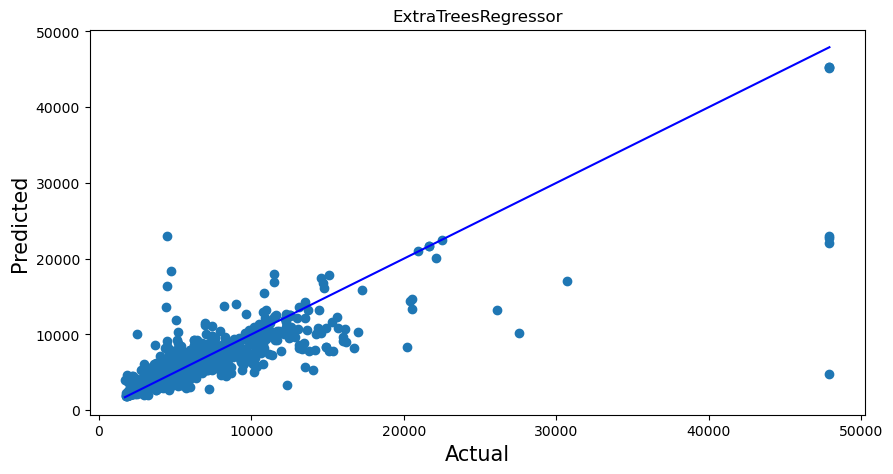

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction)
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Here, the Actual and predicted values are shown above in scatter plot.

Thank You